In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib
import scipy.cluster.hierarchy as sch
sns.set_style("darkgrid")

# Parsing outputs

In [2]:
 #./score_metagenomes.sh /data3/valerie/metagenomes/fasta.files/ > output_metagenomes.tsv &
 # ./score_genomes.sh /home/valdeanda/azufre_project/new_2017/nr2016genomes/genomes_renamed/ > output_genomes.tsv &

In [8]:
df_gen=pd.read_table("Gen_completeness.tab",index_col=0)
df_gen.head()

,Sp,MEBS_SS,Comp_mean,P1,P2,P3,P4,P5,P6,P7,...,P19,P20,P21,P22,P23,P24,P25,P26,P28,P29
GenomeID,,,,,,,,,,,,,,,,,,,,,
GCF_000005825.2,Bacillus pseudofirmus OF4,2.366,66.5,77.8,40.0,50.0,47.1,45.0,40.0,44.4,...,85.7,57.1,0.0,71.4,72.7,100.0,100.0,100.0,100.0,50.0
GCF_000005845.2,Escherichia coli str. K-12 substr. MG1655,2.345,75.4,55.6,30.0,100.0,64.7,65.0,50.0,77.8,...,85.7,71.4,0.0,71.4,81.8,100.0,100.0,100.0,100.0,50.0
GCF_000006175.1,Methanococcus voltae A3,6.122,53.3,33.3,10.0,0.0,52.9,45.0,45.0,66.7,...,57.1,28.6,0.0,28.6,63.6,100.0,100.0,100.0,75.0,58.3
GCF_000006605.1,Corynebacterium jeikeium K411,-2.895,54.9,44.4,50.0,0.0,17.6,45.0,15.0,11.1,...,85.7,42.9,0.0,42.9,63.6,100.0,100.0,100.0,100.0,0.0
GCF_000006625.1,Ureaplasma parvum serovar 3 str. ATCC 700970,-0.861,13.5,11.1,10.0,0.0,0.0,10.0,0.0,0.0,...,28.6,0.0,0.0,0.0,27.3,50.0,50.0,50.0,25.0,0.0


In [11]:
df_met=pd.read_excel("Met_completeness_private.xlsx",index_col=0)
df_met.head()


,GenF,MEBS_SS,Comp_mean,P1,P2,P3,P4,P5,P6,P7,...,P19,P20,P21,P22,P23,P24,P25,P26,P28,P29
Metagenome,,,,,,,,,,,,,,,,,,,,,
4440036.3,30,0.377,45.4,44.4,10,50,17.6,20,10,22.2,...,85.7,14.3,0,14.3,72.7,100,100,100,50,25.0
4440037.3,30,1.028,46.3,33.3,10,50,11.8,5,20,11.1,...,85.7,0.0,0,28.6,72.7,100,100,100,75,33.3
4440038.3,30,0.218,66.0,66.7,20,50,35.3,40,35,44.4,...,85.7,28.6,0,71.4,81.8,100,100,100,75,41.7
4440039.3,30,1.119,56.6,55.6,20,50,23.5,25,20,33.3,...,85.7,14.3,0,57.1,72.7,100,100,100,75,33.3
4440041.3,30,0.592,54.4,44.4,10,50,29.4,30,25,33.3,...,57.1,42.9,0,71.4,45.5,100,100,100,100,33.3


# Statistics 

In [12]:
df_gen.describe().to_csv("df_gen.describe.tab", sep="\t")
df_met.describe().to_csv("df_men.describe.tab", sep="\t")

Select columns to do pairwaise linear regression 

In [15]:
columns = ['MEBS_SS', 'Comp_mean', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8',
       'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P28', 'P29']

indices = np.tril_indices(len(columns), k=-1)

# PairwiseLinear regresion in the Genomic dataset 

In [20]:
for i, j in zip(indices[0], indices[1]):
    col1 = columns[i]
    col2 = columns[j]
    reg = stats.linregress(df_gen[col1], df_gen[col2])
    values="{:<15}vs {:<15}r-value = {:.4}".format(col1, col2, reg.rvalue**2)
    values

# PairwiseLinear regresion in the Metagenomic dataset 

In [41]:
for i, j in zip(indices[0], indices[1]):
    col1 = columns[i]
    col2 = columns[j]
    reg = stats.linregress(df_met[col1], df_met[col2])
    print("{:<15}vs {:<15}r-value = {:.4}".format(col1, col2, reg.rvalue**2))


Comp_mean      vs MEBS_SS        r-value = 0.6372
P1             vs MEBS_SS        r-value = 0.747
P1             vs Comp_mean      r-value = 0.8736
P2             vs MEBS_SS        r-value = 0.6518
P2             vs Comp_mean      r-value = 0.8001
P2             vs P1             r-value = 0.7828
P3             vs MEBS_SS        r-value = 0.3639
P3             vs Comp_mean      r-value = 0.5678
P3             vs P1             r-value = 0.4981
P3             vs P2             r-value = 0.4829
P4             vs MEBS_SS        r-value = 0.7791
P4             vs Comp_mean      r-value = 0.9035
P4             vs P1             r-value = 0.8387
P4             vs P2             r-value = 0.785
P4             vs P3             r-value = 0.509
P5             vs MEBS_SS        r-value = 0.784
P5             vs Comp_mean      r-value = 0.901
P5             vs P1             r-value = 0.8543
P5             vs P2             r-value = 0.7617
P5             vs P3             r-value = 0.4782
P5   

P28            vs Comp_mean      r-value = 0.7275
P28            vs P1             r-value = 0.6095
P28            vs P2             r-value = 0.5633
P28            vs P3             r-value = 0.4359
P28            vs P4             r-value = 0.6563
P28            vs P5             r-value = 0.6615
P28            vs P6             r-value = 0.6511
P28            vs P7             r-value = 0.68
P28            vs P8             r-value = 0.3761
P28            vs P9             r-value = 0.672
P28            vs P10            r-value = 0.6985
P28            vs P11            r-value = 0.6005
P28            vs P12            r-value = 0.3577
P28            vs P13            r-value = 0.5699
P28            vs P14            r-value = 0.4579
P28            vs P15            r-value = 0.7069
P28            vs P16            r-value = 0.5245
P28            vs P17            r-value = 0.6113
P28            vs P18            r-value = 0.5928
P28            vs P19            r-value = 0.6684
P28

In [7]:
def plot_reg(x_label, y_label, df, color=None):
    """Easy function to plot the regression of two
    variabels in a df and to draw the values of the 
    analysis. Uses seaborn module and scipy.stats.
    
    Parameters:
    ============
    
    - x_label: string.
               Name of the column in df to plot in x
    - y_label: string
               Name fo the column in df to plot in y
    - df: Pandas DataFrame
    - color: scatter color"""
    # - Calculate linear regression
    reg = stats.linregress(df[x_label], df[y_label])
    # - plot data
    g = sns.regplot(x_label, y_label, data=df, 
                    truncate=True,
                    scatter_kws={'alpha':0.4})
    # - Annotate de regression values
    s = "$r^2 = {:.3}$\n".format(reg.rvalue**2) +\
        "$p-value_r = {:.2}$\n".format(reg.pvalue) +\
        "Model: $y = {:.2}x +{:.2}$".format(reg.slope, reg.intercept)
    plt.annotate(s=s, 
                 xy=(.05, .75), 
                 bbox=dict(boxstyle="round", fc="w"),
                 xycoords='axes fraction')
    return g, reg

# Plot selected linear regresions 


# Score and completeness

(2107, 31)

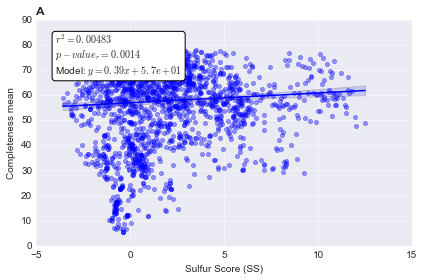

In [21]:
x= 'MEBS_SS'
y = 'Comp_mean'
plot_reg(x, y, df_gen)
plt.ylabel("Completeness mean")
plt.xlabel("Sulfur Score (SS)")
plt.title("A",loc='left', weight='bold', size='large')
plt.tight_layout()
df_gen.shape
#plt.savefig('/home/val/Dropbox/paper_azufre/resubmission/GigaScience/Figures/{}_vs_{}_gen.png'.format(x,y), dpi=300)

(937, 31)

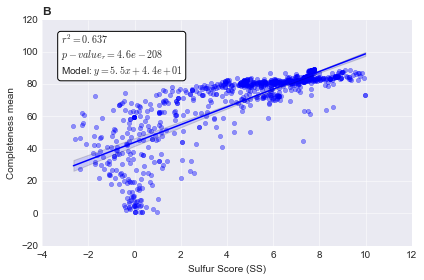

In [22]:
x= 'MEBS_SS'
y = 'Comp_mean'
plot_reg(x, y, df_met)
plt.ylabel("Completeness mean")
plt.xlabel("Sulfur Score (SS)")
plt.title("B",loc='left', weight='bold', size='large')
plt.tight_layout()
df_met.shape
#plt.savefig('/home/val/Dropbox/paper_azufre/resubmission/GigaScience/Figures/{}_vs_{}_met.png'.format(x,y), dpi=300)

# SS and marker genes 

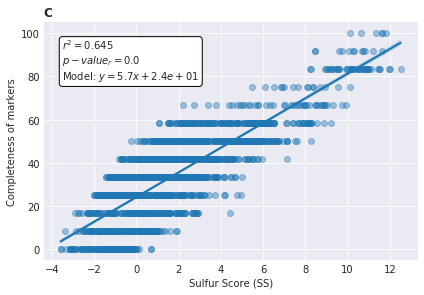

In [29]:
x= 'MEBS_SS'
y = 'P29'

with sns.axes_style("darkgrid"):
    plot_reg(x, y, df_gen)
    plt.tight_layout()

plt.ylabel("Completeness of markers")
plt.xlabel("Sulfur Score (SS)")
plt.title("C",loc='left', weight='bold', size='large')
plt.savefig('/home/val/Dropbox/paper_azufre/resubmission/GigaScience/Figures/{}_vs_{}_gen.png'.format(x,y), dpi=300)

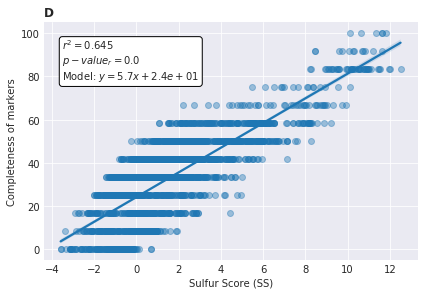

In [33]:
x= 'MEBS_SS'
y = 'P29'

with sns.axes_style("darkgrid"):
    plot_reg(x, y, df_gen)
    plt.tight_layout()

plt.ylabel("Completeness of markers")
plt.xlabel("Sulfur Score (SS)")
plt.title("D",loc='left', weight='bold', size='large')
plt.savefig('/home/val/Dropbox/paper_azufre/resubmission/GigaScience/Figures/{}_vs_{}_met.png'.format(x,y), dpi=300)

# Mean and markers 

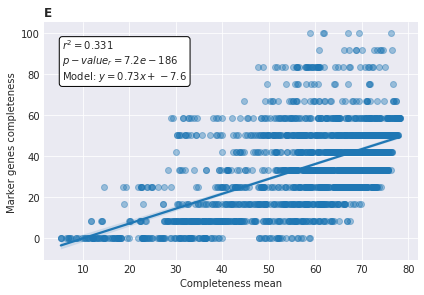

In [34]:
x= 'Comp_mean'
y = 'P29'

with sns.axes_style("darkgrid"):
    plot_reg(x, y, df_gen)
    plt.tight_layout()

plt.ylabel("Marker genes completeness")
plt.xlabel("Completeness mean")
plt.title("E",loc='left', weight='bold', size='large')
plt.savefig('/home/val/Dropbox/paper_azufre/resubmission/GigaScience/Figures/{}_vs_{}.gen.png'.format(x,y), dpi=300)

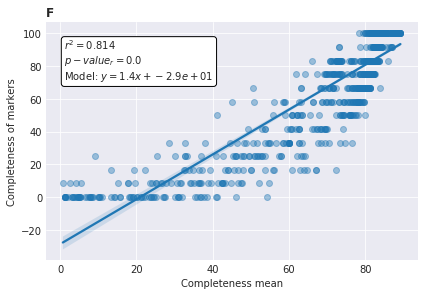

In [36]:
x= 'Comp_mean'
y = 'P29'

with sns.axes_style("darkgrid"):
    plot_reg(x, y, df_met)
    plt.tight_layout()

plt.ylabel("Completeness of markers")
plt.xlabel("Completeness mean")
plt.title("F",loc='left', weight='bold', size='large')
plt.savefig('/home/val/Dropbox/paper_azufre/resubmission/GigaScience/Figures/{}_vs_{}.met.png'.format(x,y), dpi=300)